# **Анализ закономерностей рынка видеоигр.**

## Описание проекта

Интернет- магазин «Стримчик», продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Описание данных
- **Name** — название игры
- **Platform** — платформа
- **Year_of_Release** — год выпуска
- **Genre** — жанр игры
- **NA_sales** — продажи в Северной Америке (миллионы долларов)
- **EU_sales** — продажи в Европе (миллионы долларов)
- **JP_sales** — продажи в Японии (миллионы долларов)
- **Other_sales** — продажи в других странах (миллионы долларов)
- **Critic_Score** — оценка критиков (максимум 100)
- **User_Score** — оценка пользователей (максимум 10)
- **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


Данные за 2016 год могут быть неполными.


# План работы

**План работы**

**Шаг 1.** Откроем файл с данными и изучим общую информацию


**Шаг 2.** Подготовим данные
 - Заменим названия столбцов (приведем к нижнему регистру);
 - Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему;
 - Обработаем пропуски при необходимости:
 - Объясним, почему заполнили пропуски определённым образом или почему не стали это делать;
 - Опишем причины, которые могли привести к пропускам;
 - Обратим внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберем это значение и опишем, как его обработать;
 - Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

**Шаг 3.** Проведем исследовательский анализ данных

 - Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
 - Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не будем учитывать в работе данные за предыдущие годы.
Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.
 - Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.
 - Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.  - -   - Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.
 - Соотнесем выводы с продажами игр на других платформах.
 - Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

**Шаг 4.** Составим портрет пользователя каждого региона

 - Определим для пользователя каждого региона (NA, EU, JP):
 - Самые популярные платформы (топ-5). Опишем различия в долях продаж.
 - Самые популярные жанры (топ-5). Поясним разницу.
 - Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**Шаг 5.** Проверим гипотезы

 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
 - Пороговое значение alpha зададим самостоятельно.
 - Поясним:
 - Как мы сформулировали нулевую и альтернативную гипотезы;
 - Какой критерий применили для проверки гипотез и почему.

**Шаг 6.** Напишем общий вывод



In [50]:
#импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from functools import reduce
idx = pd.IndexSlice
from scipy import stats as st

In [51]:
# format вывода значений в виде числа с 2-мя знаками после запятой
pd.options.display.float_format = '{:,.2f}'.format

## Ознакомление с данными

In [52]:
try:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv', sep=',')
except:
    data = pd.read_csv('games.csv', sep=',')    
display(data.head(10).T)

,0,1,2,3,4,5,6,7,8,9
Name,Wii Sports,Super Mario Bros.,Mario Kart Wii,Wii Sports Resort,Pokemon Red/Pokemon Blue,Tetris,New Super Mario Bros.,Wii Play,New Super Mario Bros. Wii,Duck Hunt
Platform,Wii,NES,Wii,Wii,GB,GB,DS,Wii,Wii,NES
Year_of_Release,"2,006.00","1,985.00","2,008.00","2,009.00","1,996.00","1,989.00","2,006.00","2,006.00","2,009.00","1,984.00"
Genre,Sports,Platform,Racing,Sports,Role-Playing,Puzzle,Platform,Misc,Platform,Shooter
NA_sales,41.36,29.08,15.68,15.61,11.27,23.20,11.28,13.96,14.44,26.93
EU_sales,28.96,3.58,12.76,10.93,8.89,2.26,9.14,9.18,6.94,0.63
JP_sales,3.77,6.81,3.79,3.28,10.22,4.22,6.50,2.93,4.70,0.28
Other_sales,8.45,0.77,3.29,2.95,1.00,0.58,2.88,2.84,2.24,0.47
Critic_Score,76.00,NaN,82.00,80.00,NaN,NaN,89.00,58.00,87.00,NaN
User_Score,8,NaN,8.3,8,NaN,NaN,8.5,6.6,8.4,NaN


In [4]:
data.tail(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16705,15 Days,PC,"2,009.00",Adventure,0.00,0.01,0.00,0.00,63.00,5.8,NaN
16706,Men in Black II: Alien Escape,GC,"2,003.00",Shooter,0.01,0.00,0.00,0.00,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,"2,014.00",Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,"2,002.00",Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,"2,008.00",Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,"2,016.00",Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,"2,006.00",Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,"2,016.00",Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,"2,003.00",Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,"2,016.00",Simulation,0.00,0.00,0.01,0.00,NaN,NaN,NaN


In [5]:
#посморим общую информацию о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Видим, что в таблице есть пропуски в столбцах Name, Year_of_Release , Genre, Critic_Score, User_Score, Rating. А также видим несоответствие типов данных в некоторых столбцах. Также названия столбцов нужно откорректировать.

## Предобработка данных.

In [6]:
#Приведем столбцы к нижнему регистру
data.columns=data.columns.str.lower()


In [7]:
# Посмотрим на пропуски поближе
round(data.isnull().sum() / data.shape[0] * 100,2)

name               0.01
platform           0.00
year_of_release    1.61
genre              0.01
na_sales           0.00
eu_sales           0.00
jp_sales           0.00
other_sales        0.00
critic_score      51.32
user_score        40.09
rating            40.48
dtype: float64

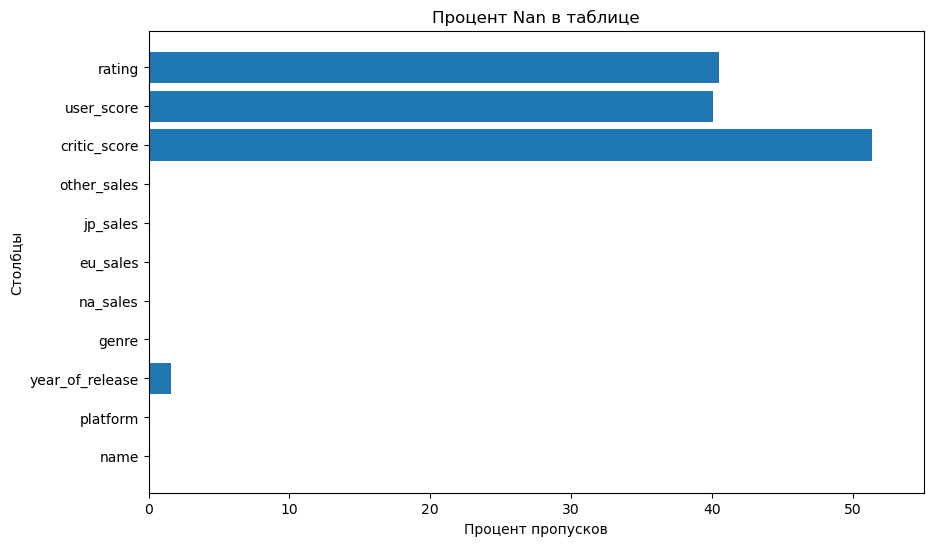

In [8]:
#отобразим процент пропусков по столбцам графически
percent_of_nulls = (data.isnull().sum() / data.shape[0]) * 100
plt.figure(figsize=(10, 6))
plt.barh(percent_of_nulls.index,percent_of_nulls.values)
plt.xlabel('Процент пропусков')
plt.ylabel('Столбцы')
plt.title('Процент Nan в таблице')
plt.xlim(0, 55);

In [9]:
#В столбцах 'name' и 'genre' и процент пропусков одинаково маленький.Посмотрим подробнее.
data[['name','genre']].isna().sum()


name     2
genre    2
dtype: int64

In [10]:
data[data['name'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,"1,993.00",NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,"1,993.00",NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [11]:
data[data['genre'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,"1,993.00",NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,"1,993.00",NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Здесь мы видим, что это всего 2 строки, в которых пропущены название и жанр игры. Заменить эти пропущенные значения не представляется возможным, поэтому мы их удалим. К тому же это совсем небольшой процент от всех данных и удаление никак не повлияет на результат исследования.

In [12]:
#удалим эти 2 строки с пропущенными значениями
data.dropna(subset=['name'],inplace=True)

In [13]:
#проверим
data[data['genre'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Самое большое количество пропусков в столбце **'critic_score'** - 51%, заполнить медианой или средним будет некорректно, так как мы будем исследовать влияние этого параметра в дальнейшем. И такой формальное заполнение пропусков исказит результаты анализа данных и повлияет на принятие последующих решений. Поэтому  эти пропуски мы заполним значением -1, чтобы привести тип данных столбца к int и не брать их в расчет при дальнейших действиях.

In [14]:
data['critic_score'] = data['critic_score'].fillna(-1)

In [15]:
data.tail(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16705,15 Days,PC,"2,009.00",Adventure,0.00,0.01,0.00,0.00,63.00,5.8,NaN
16706,Men in Black II: Alien Escape,GC,"2,003.00",Shooter,0.01,0.00,0.00,0.00,-1.00,tbd,T
16707,Aiyoku no Eustia,PSV,"2,014.00",Misc,0.00,0.00,0.01,0.00,-1.00,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,"2,002.00",Platform,0.01,0.00,0.00,0.00,-1.00,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,"2,008.00",Racing,0.00,0.00,0.00,0.00,-1.00,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,"2,016.00",Action,0.00,0.00,0.01,0.00,-1.00,NaN,NaN
16711,LMA Manager 2007,X360,"2,006.00",Sports,0.00,0.01,0.00,0.00,-1.00,NaN,NaN
16712,Haitaka no Psychedelica,PSV,"2,016.00",Adventure,0.00,0.00,0.01,0.00,-1.00,NaN,NaN
16713,Spirits & Spells,GBA,"2,003.00",Platform,0.01,0.00,0.00,0.00,-1.00,NaN,NaN
16714,Winning Post 8 2016,PSV,"2,016.00",Simulation,0.00,0.00,0.01,0.00,-1.00,NaN,NaN


In [16]:
#видим, что в столбце 'user_score' значения 'Nan' есть значение 'tbd'
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [17]:
#посмотрим много ли таких значений
data[data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,"2,010.00",Sports,3.45,2.59,0.00,0.66,-1.00,tbd,E
301,Namco Museum: 50th Anniversary,PS2,"2,005.00",Misc,2.08,1.35,0.00,0.54,61.00,tbd,E10+
520,Zumba Fitness 2,Wii,"2,011.00",Sports,1.51,1.03,0.00,0.27,-1.00,tbd,T
645,uDraw Studio,Wii,"2,010.00",Misc,1.65,0.57,0.00,0.20,71.00,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.00,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,"2,001.00",Action,0.01,0.00,0.00,0.00,67.00,tbd,E
16697,Bust-A-Move 3000,GC,"2,003.00",Puzzle,0.01,0.00,0.00,0.00,53.00,tbd,E
16698,Mega Brain Boost,DS,"2,008.00",Puzzle,0.01,0.00,0.00,0.00,48.00,tbd,E
16704,Plushees,DS,"2,008.00",Simulation,0.01,0.00,0.00,0.00,-1.00,tbd,E




В столбце **'user_score'** - 40% пропусков это тоже очень много. Также мы видим среди прочих значений абревиатуру 'tbd' - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято.То есть по сути у этой игры пока нет рейтинга и это приравнивается к пропуску в столбце. Целесообразно заполнить значения 'tbd' -1, как и значения Nan в этом столбце, мы тоже заменим -1.Ведь даже если у игры будет рейтинг 0, мы не запутаемся в значниях. 



In [18]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN).astype('float')

In [19]:
data['user_score'] = data['user_score'].fillna(-1)

Столбец **'rating'** - 40%, тоже значимый для нас параметр. Этот столбец имеет строковый тип и заполнен различными рейтингами. Принято решение заполнить значением "no_rating".

In [20]:
# заполним пропуски ещё одним рейтингом "нет рейтинга"
data['rating'] = data['rating'].fillna('no_rating')
data['rating'].isna().sum()

0

In [21]:
#посмотрим количество пропусков в столбце 'year_of_release'
data['year_of_release'].isna().sum()

269

In [22]:
# используем лямбда функцию для замены пропущенных значений по годам,
# группируя по названию платформ и подсчитывая медиану
#data['year_of_release'] = data.groupby(
 #   'platform')['year_of_release'].apply(lambda x: x.fillna(x.median()).astype(int)
 #   )

Пропуски в столбце 'year_of_release' не заполняем, так как данные этого столбца не повлияют на наши выводы.

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [24]:
#суммируем продажи повсем регионам и добавим результат в отдельный столбец
data['sales_total'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.T

,0,1,2,3,4,5,6,7,8,9,...,16705,16706,16707,16708,16709,16710,16711,16712,16713,16714
name,Wii Sports,Super Mario Bros.,Mario Kart Wii,Wii Sports Resort,Pokemon Red/Pokemon Blue,Tetris,New Super Mario Bros.,Wii Play,New Super Mario Bros. Wii,Duck Hunt,...,15 Days,Men in Black II: Alien Escape,Aiyoku no Eustia,Woody Woodpecker in Crazy Castle 5,SCORE International Baja 1000: The Official Game,Samurai Warriors: Sanada Maru,LMA Manager 2007,Haitaka no Psychedelica,Spirits & Spells,Winning Post 8 2016
platform,Wii,NES,Wii,Wii,GB,GB,DS,Wii,Wii,NES,...,PC,GC,PSV,GBA,PS2,PS3,X360,PSV,GBA,PSV
year_of_release,"2,006.00","1,985.00","2,008.00","2,009.00","1,996.00","1,989.00","2,006.00","2,006.00","2,009.00","1,984.00",...,"2,009.00","2,003.00","2,014.00","2,002.00","2,008.00","2,016.00","2,006.00","2,016.00","2,003.00","2,016.00"
genre,Sports,Platform,Racing,Sports,Role-Playing,Puzzle,Platform,Misc,Platform,Shooter,...,Adventure,Shooter,Misc,Platform,Racing,Action,Sports,Adventure,Platform,Simulation
na_sales,41.36,29.08,15.68,15.61,11.27,23.20,11.28,13.96,14.44,26.93,...,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.00
eu_sales,28.96,3.58,12.76,10.93,8.89,2.26,9.14,9.18,6.94,0.63,...,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00
jp_sales,3.77,6.81,3.79,3.28,10.22,4.22,6.50,2.93,4.70,0.28,...,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.01,0.00,0.01
other_sales,8.45,0.77,3.29,2.95,1.00,0.58,2.88,2.84,2.24,0.47,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
critic_score,76.00,-1.00,82.00,80.00,-1.00,-1.00,89.00,58.00,87.00,-1.00,...,63.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
user_score,8.00,-1.00,8.30,8.00,-1.00,-1.00,8.50,6.60,8.40,-1.00,...,5.80,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
 11  sales_total      16713 non-null  float64
dtypes: float64(8), object(4)
memory usage: 2.2+ MB


In [26]:
# Посмотрим на пропуски поближе
round(data.isnull().sum() / data.shape[0] * 100,2)

name              0.00
platform          0.00
year_of_release   1.61
genre             0.00
na_sales          0.00
eu_sales          0.00
jp_sales          0.00
other_sales       0.00
critic_score      0.00
user_score        0.00
rating            0.00
sales_total       0.00
dtype: float64

In [27]:
#проверим на дубликаты
data.duplicated().sum()

0

Явных дубликатов нет.

Проверим данные на неявные дубликаты.

In [28]:
data[['name','platform','year_of_release']].duplicated().sum()

1

In [29]:
data[data[['name','platform', 'year_of_release']].duplicated() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
16230,Madden NFL 13,PS3,"2,012.00",Sports,0.00,0.01,0.00,0.00,83.00,5.50,E,0.01


In [30]:
data = data.drop_duplicates(subset=(['name','platform', 'year_of_release']),keep='first')
data.reset_index(drop=True)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,-1.00,-1.00,no_rating,40.24
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,-1.00,-1.00,no_rating,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16707,Samurai Warriors: Sanada Maru,PS3,"2,016.00",Action,0.00,0.00,0.01,0.00,-1.00,-1.00,no_rating,0.01
16708,LMA Manager 2007,X360,"2,006.00",Sports,0.00,0.01,0.00,0.00,-1.00,-1.00,no_rating,0.01
16709,Haitaka no Psychedelica,PSV,"2,016.00",Adventure,0.00,0.00,0.01,0.00,-1.00,-1.00,no_rating,0.01
16710,Spirits & Spells,GBA,"2,003.00",Platform,0.01,0.00,0.00,0.00,-1.00,-1.00,no_rating,0.01


In [31]:
data[data[['name','platform', 'year_of_release']].duplicated() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total


Избавились от неявных дубликатов.

**Вывод:**

В результате предобработки данных мы сделали следующее:

 - заменили названия столбцов (привели их к нижнему регистру), преобразовали данные в нужные типы. 
 - столбцах 'critic_score' и 'user_score' пропуски заполнили значением -1 для того, чтобы данные оставались достоверными и при этом была возможность привести тип данных к int для удобства дальнейших расчетов.
 - в столбце 'user score' абревиатуру tbd предварительно заменили на Nan, а затем на -1. 
 - пропуски вышеперечисленных столбцах могли возникнуть по причине того, что не все игроки оставляют свои оценки играм, а также абревиатура tbd означает, что оценка еще не определена.
 - удалили явные и неявные дубликаты.

## Исследовательскй анализ данных

 - Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды? 
 
 - Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
 
 - Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не будем учитывать в работе данные за предыдущие годы.
 
 - Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.
 
 - Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.
 - Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.  
 - Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.
  
 - Соотнесем выводы с продажами игр на других платформах.
 
 - Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?


### Количество игр в разные годы. 

Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [32]:
# создадим сводную таблицу и посчитаем суммарное кол-во игр по годам
count_games = data.pivot_table(index='year_of_release', 
                                        values='name', aggfunc='count')
count_games

,name
year_of_release,
"1,980.00",9
"1,981.00",46
"1,982.00",36
"1,983.00",17
"1,984.00",14
"1,985.00",14
"1,986.00",21
"1,987.00",16
"1,988.00",15


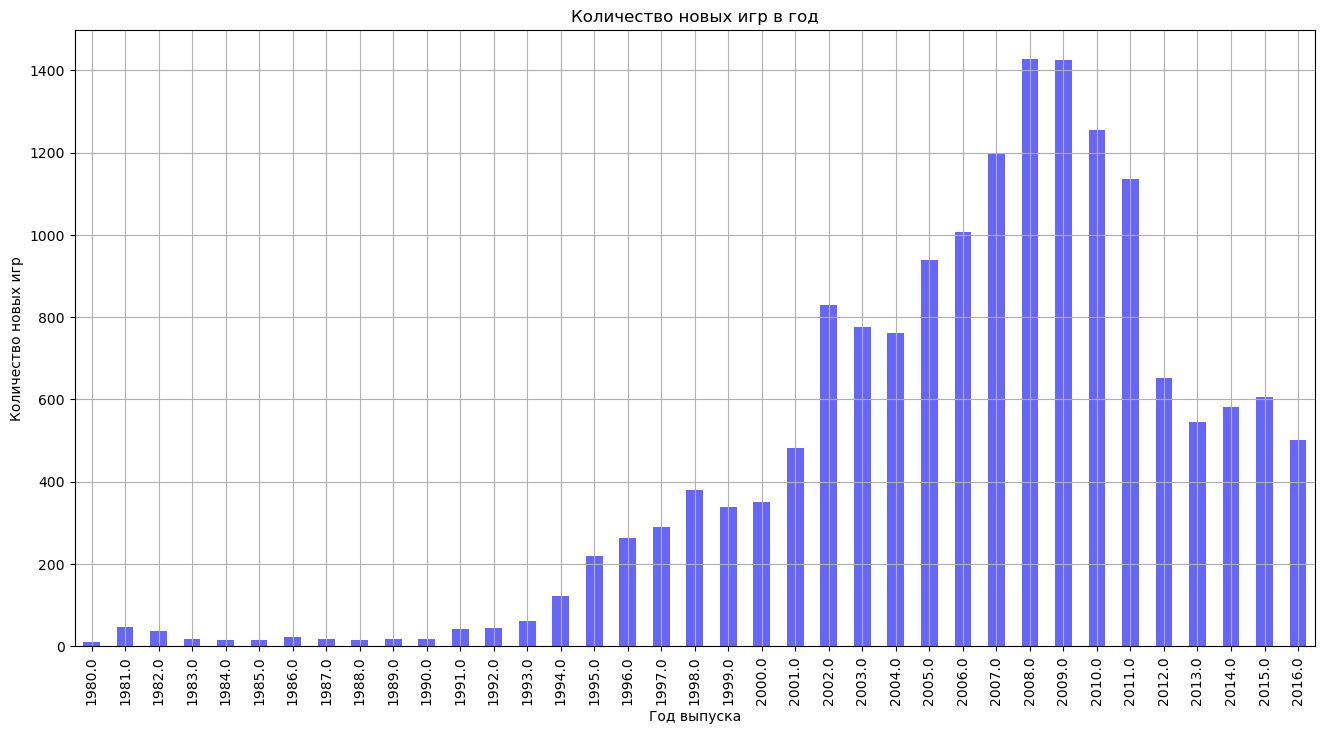

In [33]:
# построим график
data.pivot_table(
    index='year_of_release', values='name', aggfunc='count').plot(y = 'name', kind = 'bar',\
figsize = (16,8), title='Количество новых игр в год', grid= True, color='blue', alpha=0.6, legend=False)\
.set(xlabel='Год выпуска', ylabel='Количество новых игр');

 По графику мы видим, что с 1980 по 1994 г. выпускалось мало игр. С 1994 по 2010г. количество игр на игровые приставки и компьютеры начинает расти с большой скоростью.
 
 Затем с 2011г. начинается резкий спад, возможно это связано с созданием большого количества мобильных приложений и мобильных игр. Игры все больше переходят в онлайн. Это всё привело к тому, что интерес к самим играм упал, соответственно, упало и их производство.
 
 Для анализа возьмем период с 1994 по 2011г.(судя по графику до 1994 данные не так интересны для анализа).

### Продажи игр по платформам.

Посмотрим, как менялись продажи по платформам.
Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
 
Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не будем учитывать в работе данные за предыдущие годы.
 
Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

In [34]:
# выведем топ платформ по суммарным продажам
data.groupby('platform')['sales_total'].sum().sort_values(ascending=False)

platform
PS2    1,255.77
X360     971.42
PS3      939.64
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: sales_total, dtype: float64

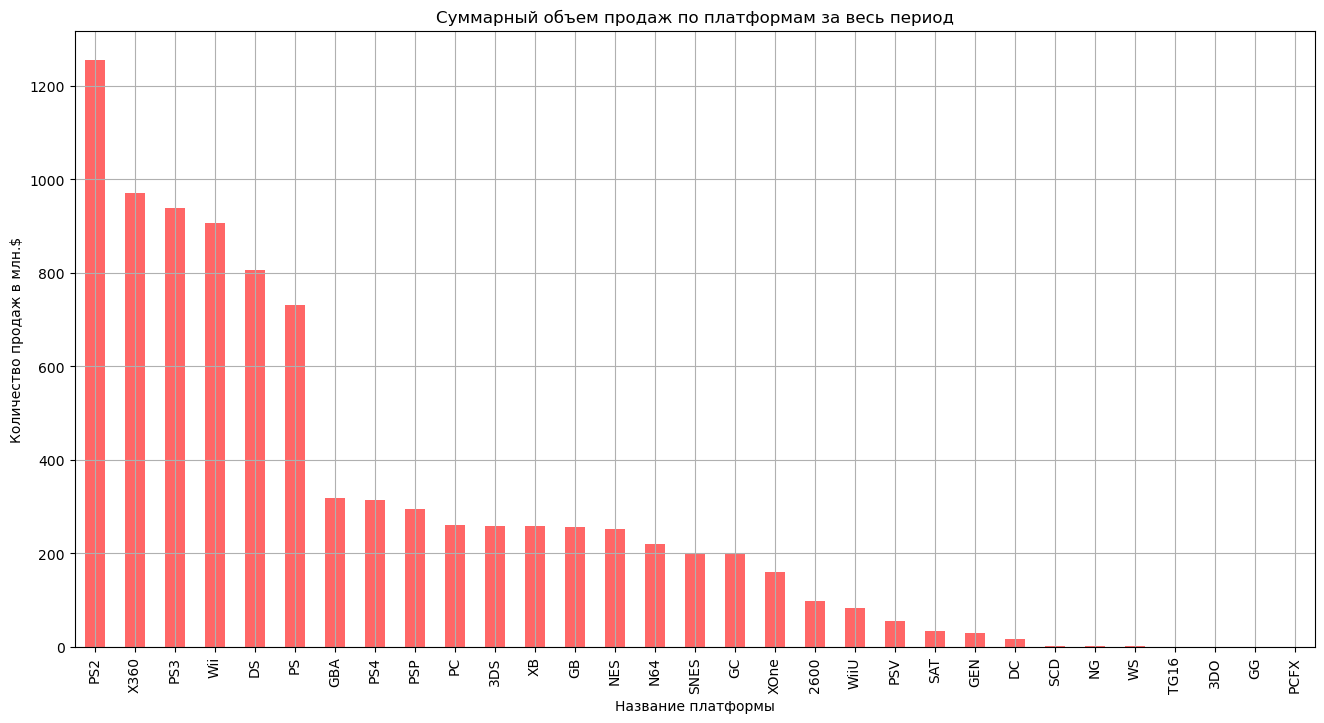

In [35]:
data.pivot_table(
    index='platform', values='sales_total', aggfunc='sum').sort_values(by='sales_total', ascending=False)\
.plot(y = 'sales_total', kind = 'bar',\
figsize = (16,8), title='Суммарный объем продаж по платформам за весь период', grid= True, color='red', alpha=0.6, legend=False)\
.set(xlabel='Название платформы', ylabel='Количество продаж в млн.$');

На графике явно видны лидеры "PS2", "X360", "PS3", "Wii", "DS","PS".

In [36]:
# сделаем срез данных по топ платформам, у которых более 500 млн
top_platforms = data.query('platform in("PS2", "X360", "PS3", "DS", "Wii", "PS")')
top_platforms.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
6,New Super Mario Bros.,DS,"2,006.00",Platform,11.28,9.14,6.50,2.88,89.00,8.50,E,29.80
7,Wii Play,Wii,"2,006.00",Misc,13.96,9.18,2.93,2.84,58.00,6.60,E,28.91
8,New Super Mario Bros. Wii,Wii,"2,009.00",Platform,14.44,6.94,4.70,2.24,87.00,8.40,E,28.32
10,Nintendogs,DS,"2,005.00",Simulation,9.05,10.95,1.93,2.74,-1.00,-1.00,no_rating,24.67
11,Mario Kart DS,DS,"2,005.00",Racing,9.71,7.47,4.13,1.90,91.00,8.60,E,23.21
13,Wii Fit,Wii,"2,007.00",Sports,8.92,8.03,3.60,2.15,80.00,7.70,E,22.70
14,Kinect Adventures!,X360,"2,010.00",Misc,15.00,4.89,0.24,1.69,61.00,6.30,E,21.82


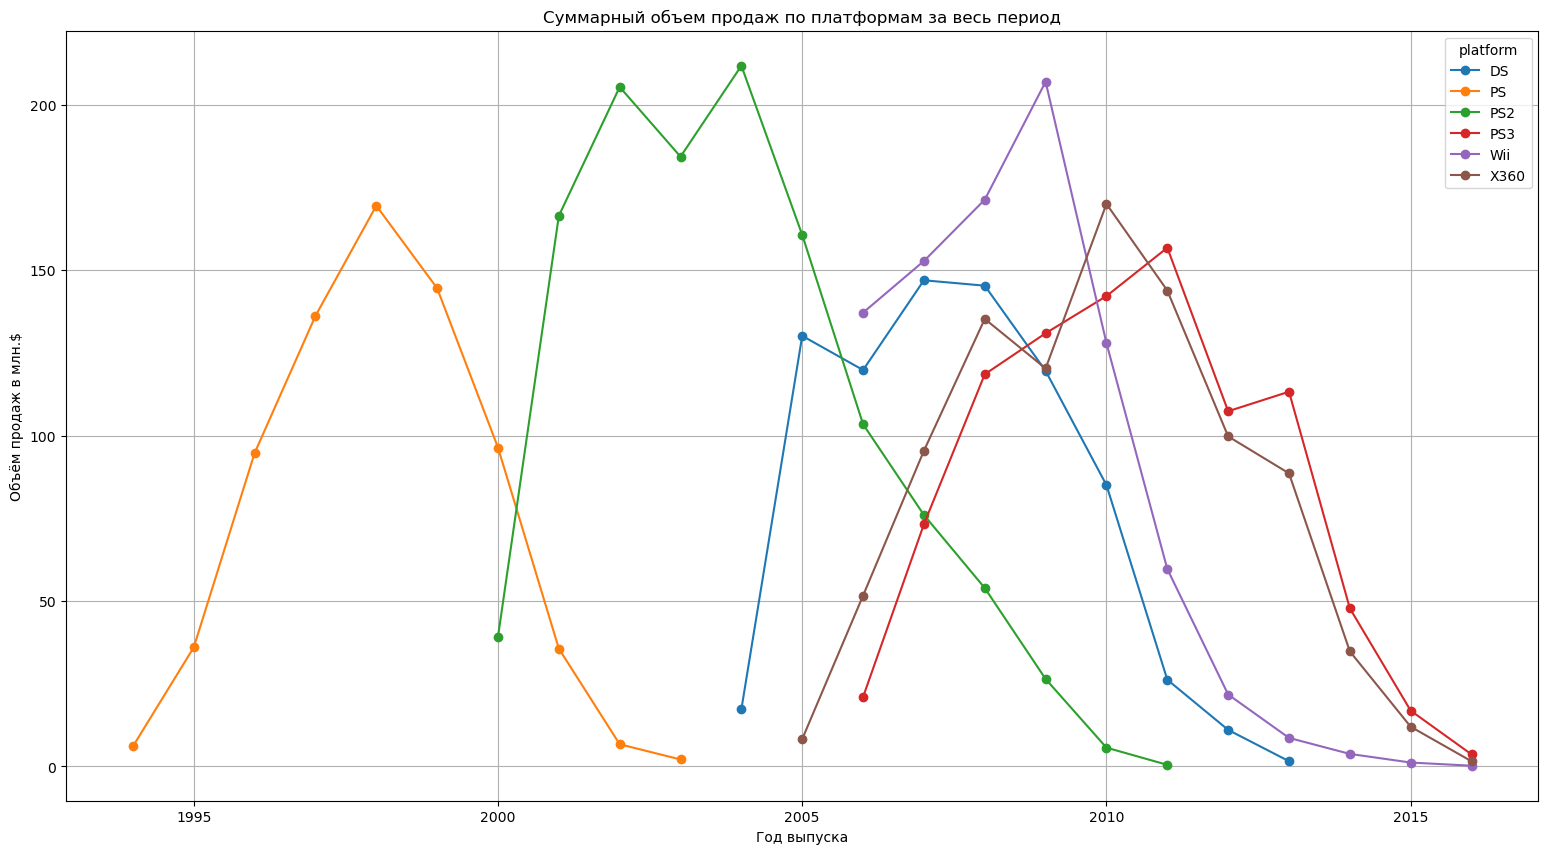

In [37]:
#оставим в выгрузке только нужные года
data_years = top_platforms.query("year_of_release >= 1994")
#построим график распределения по годам
data_years.pivot_table(index='year_of_release', columns = 'platform', values='sales_total', aggfunc='sum').\
plot(grid=True, figsize=(19, 10), style='-o')
plt.title("Суммарный объем продаж по платформам за весь период")
plt.xlabel("Год выпуска")
plt.ylabel("Объём продаж в млн.$");

Какие платформы лидируют по продажам, растут или падают?
Характерное время жизни платформ, есть ли рост к 2016 году

 - PS 1994-2003, около 9 лет, роста нет.
 - PS2 2000-2011, около 11 лет, роста нет.
 - DS 2004-2013,  около 9 лет, роста нет.
 - PS3 2006-2016, 10 лет, роста нет, но возможно есть потенциал так как данные за 2016 год не полные.
 - WII 2006-2016, 10 лет, роста нет, но возможно есть потенциал так как данные за 2016 год не полные.
 - X360 2005-2016 11 лет, роста нет, но возможно есть потенциал так как данные за 2016 год не полные.
Из графика видно средний срок жизни платформ около 10 лет.

**Вывод о продажах по годам и платформам.**

Анализируя рынок игр и платформ делаю вывод, что рынок резко начал расти с выходом PS2 около 2001 года. Приобрёл максимальную конкуренцию начиная с 2006 года, когда на рынок вышли X360, Wii, DS. К 2012 году основные старые платформы закончили свою жизнь, после 2011 года года было резкое падение рынка, лучше этот год и ранее не брать. Т.к. средний период жизни платформы около 10 лет. За этот период игры продаются следующим образом: первые 5 лет рост продаж, затем пик и спад продаж.Это обусловлено тем, что выходит новая игра и игроки постепенно переходят на новую платформу.Такой переход длится 4-5лет, в этот период снижается выпуск игр для старых платформ, а для новых наращивает обороты.
Начиная с 2012 года и будет актуальная для нас выборка. Далее расмотрим, какие платформы имеют рост в этот период.

### Актуальные лидеры

Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ

In [38]:
# делаем нужный нам срез
df_2012 = data.query('year_of_release >= 2012').reset_index()
df_2012.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,16,Grand Theft Auto V,PS3,"2,013.00",Action,7.02,9.09,0.98,3.96,97.00,8.20,M,21.05
1,23,Grand Theft Auto V,X360,"2,013.00",Action,9.66,5.14,0.06,1.41,97.00,8.10,M,16.27
2,31,Call of Duty: Black Ops 3,PS4,"2,015.00",Shooter,6.03,5.86,0.36,2.38,-1.00,-1.00,no_rating,14.63
3,33,Pokemon X/Pokemon Y,3DS,"2,013.00",Role-Playing,5.28,4.19,4.35,0.78,-1.00,-1.00,no_rating,14.60
4,34,Call of Duty: Black Ops II,PS3,"2,012.00",Shooter,4.99,5.73,0.65,2.42,83.00,5.30,M,13.79


Мы сделалали срез по актуальным данным с 2012 года.

In [39]:
# создадим сводную таблицу и посчитаем суммарное кол-во денег
data_leader_platform = df_2012.pivot_table(index=['year_of_release'], 
                                       columns='platform',
                                       values='sales_total',
                                       aggfunc='sum')
data_leader_platform.head(5)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
"2,012.00",51.36,11.01,23.22,107.35,NaN,7.69,16.19,21.71,17.56,99.74,NaN
"2,013.00",56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
"2,014.00",43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
"2,015.00",27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
"2,016.00",15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


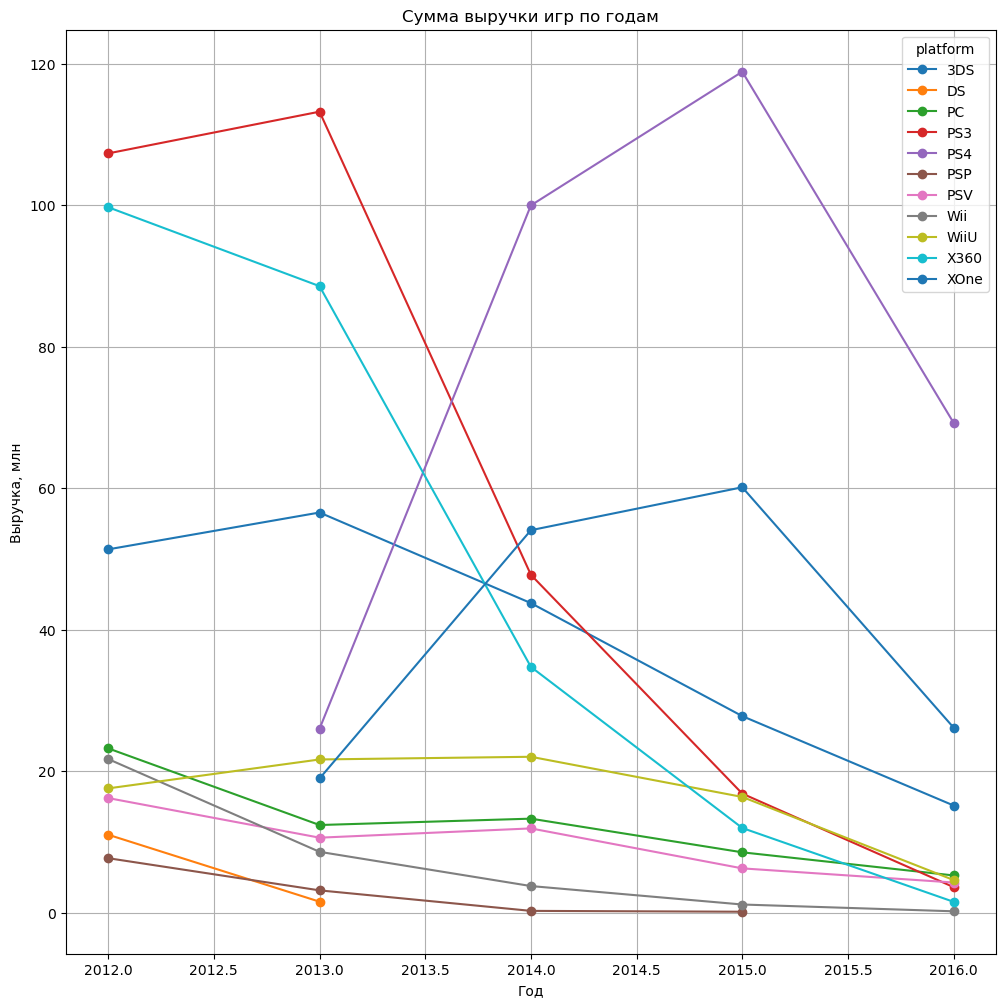

In [40]:
# построим график для платформ
data_leader_platform.plot(y=['3DS', 'DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne'],
                               grid=True,
                               style='-o',
                               figsize=(12, 12))
plt.title('Сумма выручки игр по годам')
plt.ylabel('Выручка, млн')
plt.xlabel('Год');

В таблице нам даны неполные данные за 2016 год, поэтому будем смотреть по 2015 году.
Судя по графику  рост продаж на 2015 имеют PS4 - 119 млн. продаж и XOne - 60 млн.
следующим идет 3DS (28 млн.), на 4 месте - PC (здесь стагнация рынка).
На X360 и Wii не стоит делать ставку так как их продажи почти равны 0. Да и остальные платформы судя по графику продолжат падать.


In [41]:
#отфильтруем наш топ-5
top_5 = data_leader_platform.loc[:, ['PS4','XOne', 'PC', '3DS', 'PS3']]
top_5.head()

platform,PS4,XOne,PC,3DS,PS3
year_of_release,,,,,
"2,012.00",NaN,NaN,23.22,51.36,107.35
"2,013.00",25.99,18.96,12.38,56.57,113.25
"2,014.00",100.00,54.07,13.28,43.76,47.76
"2,015.00",118.90,60.14,8.52,27.78,16.82
"2,016.00",69.25,26.15,5.25,15.14,3.60


### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

 Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.
 Возьмем актуальный период с 2012 по 2016 год.

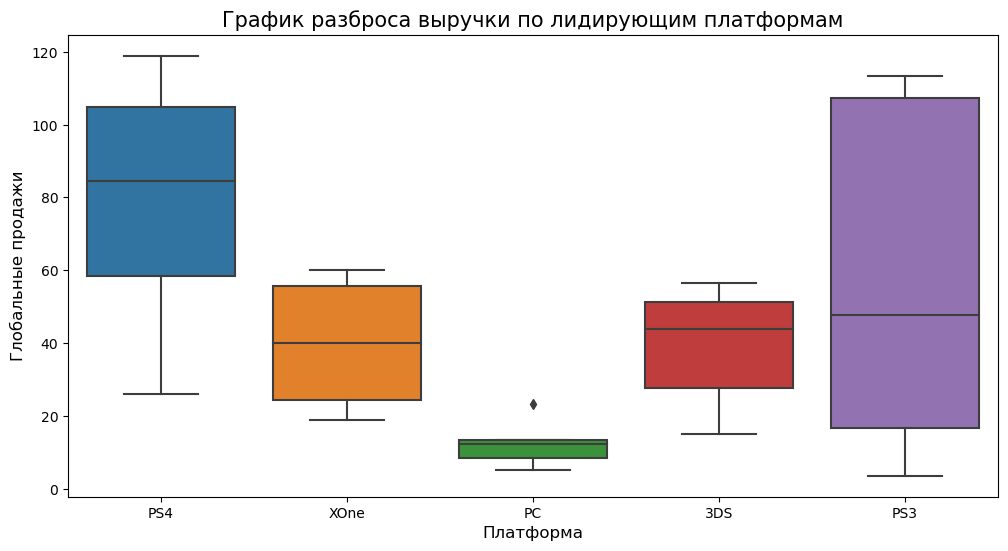

In [42]:
#нарисуем ящики с усами для топовых платформ 

plt.figure(figsize=(12,6))
sns.boxplot(data = top_5)
plt.title('График разброса выручки по лидирующим платформам', fontsize=15)

plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12);

In [43]:
top_5.describe()

platform,PS4,XOne,PC,3DS,PS3
count,4.00,4.00,5.00,5.00,5.00
mean,78.53,39.83,12.53,38.92,57.76
std,40.57,20.31,6.78,17.17,50.62
min,25.99,18.96,5.25,15.14,3.60
25%,58.44,24.35,8.52,27.78,16.82
50%,84.62,40.11,12.38,43.76,47.76
75%,104.72,55.59,13.28,51.36,107.35
max,118.90,60.14,23.22,56.57,113.25


- Провели срез данных для того, чтобы отрисовать ящики с усами. 
- Исходя из графиков видно, что медиана протекает у всех по разному
- Больше всего в среднем продаж у PS4 (78.54 млн.), затем PS3(57.76). Затем почти на одном уровне - 3DS(38.92 млн.)и XOne(39.83 млн.), и на последнем месте PC - (12.53млн.). 

### Влияние отзывов критиков и пользователей внутри платформы внутри самой популярной

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.
Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.


In [44]:
# посмотрим топ платформ по кол-ву игр
df_2012.groupby('platform')['name'].count().sort_values(ascending=False)

platform
PS3     492
PSV     411
3DS     396
PS4     392
X360    292
PC      250
XOne    247
PSP     173
WiiU    147
Wii      54
DS       31
Name: name, dtype: int64

In [45]:
#посмотрим топ по общим продажам
df_2012.pivot_table(index='platform', values='sales_total', aggfunc='sum').nlargest(10, 'sales_total')

,sales_total
platform,
PS4,314.14
PS3,288.78
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


Выделим список 5 лидеров по продажам и соответственно это будут самые популярные платформы c 2012г..

In [46]:
top_list_5=df_2012.pivot_table(index='platform', values='sales_total', aggfunc='sum').nlargest(5, 'sales_total')
top_list_5

,sales_total
platform,
PS4,314.14
PS3,288.78
X360,236.54
3DS,194.61
XOne,159.32


Из них, за образец возьмем PS3 - она давно на рынке, по ней много данных, при этом даже на конец 2016 года она является одной из самых популярных игровых платформ.

In [47]:
#отсортруем данные таблицы и создадим таблицу по нашему лидеру c учетом предыдущей замены пропусков значением -1
data_ps3 = df_2012[(df_2012['platform'] == 'PS3') & (df_2012['critic_score'] > 0)]
data_ps3.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,16,Grand Theft Auto V,PS3,"2,013.00",Action,7.02,9.09,0.98,3.96,97.00,8.20,M,21.05
4,34,Call of Duty: Black Ops II,PS3,"2,012.00",Shooter,4.99,5.73,0.65,2.42,83.00,5.30,M,13.79
11,69,Call of Duty: Ghosts,PS3,"2,013.00",Shooter,4.10,3.63,0.38,1.25,71.00,2.60,M,9.36
15,81,FIFA Soccer 13,PS3,"2,012.00",Action,1.06,5.01,0.13,1.97,88.00,6.60,E,8.17
26,126,FIFA 14,PS3,"2,013.00",Sports,0.78,4.24,0.07,1.37,86.00,4.30,E,6.46


In [48]:
#посмотрим корреляцию данных
PS3_cor=data_ps3.corr()
PS3_cor

ValueError: could not convert string to float: 'Grand Theft Auto V'

In [ ]:
#нарисуем тепловую карту отражающую корреляцию по всем столбцам таблицы
plt.figure(figsize=(9,9))
sns.heatmap(PS3_cor, annot=True, cmap="ocean_r", fmt='.2f', annot_kws={'size':16});

In [ ]:
# выделим только нужные нам значения
games_ps3_filtered = data_ps3[['sales_total' ,'critic_score', 'user_score']]
games_ps3_filtered.head() 

In [ ]:
#нарисуем тепловую карту для нужных нам значений
plt.figure(figsize=(1,3))
sns.heatmap(games_ps3_filtered.corr()[['sales_total']]
            .sort_values(by='sales_total', ascending=False), cmap="ocean_r", 
            annot=True, annot_kws={'size':15});

Видим, что зависимость продаж от оценок критиков невелика - 0,33 но больше, чем с оценками пользователей (корреляция  - 0,12). т.е оценка критиков влияет на заинтересованность покупателей, но не определяет ее.
 Посмотрим эту зависимость на диаграмме рассеяния. Так как графически более наглядно можно увидеть нет ли каких либо других факторов влияющих на продажи и на оценки.

In [ ]:
# нарисуем диаграмму рассеяния корреляции оценок критиков и продаж.
data_ps3.plot(kind='scatter', x='critic_score', y='sales_total', color='blue', figsize=(10,5), grid=True);
plt.title('Диаграмма рассеяния для PS3. Корреляция с оценками критиков');

С увеличением среднего рейтинга критиков, увеличивается и средний уровень выручки с продажи игр.
Это логично: чем качественнее игра, тем больше денег она приносит разработчику и издателю.

Теперь  посмотрим на корреляцию продаж с отзывами пользователей.

In [ ]:
# нарисуем диаграмму рассеяния корреляции оценок пользователей и продаж.
data_ps3.plot(kind='scatter', x='user_score', y='sales_total', color='blue', figsize=(10,5), grid=True)
plt.title('Диаграмма рассеяния для PS3. Корреляция с оценками пользователей');

Практически та же картина.За исключением выбросов - когда рейтинг невелик, но игра все равно хорошо продается. Думаю это связано с обширной рекламной компанией, когда игра покупается пользователем, но разочаровавшись, поиграв в нее пользователь в итоге ставит среднюю оценку. 

### Соотнесем выводы с продажами игр на других платформах.

Сгруппируем данные за актуальный период  (с 2012 по 2016 г.) по платформам и посмотрим на связи рейтингов и продаж на других платформах.

In [ ]:
other_platforms=df_2012.query('platform != "PS3" & critic_score > 0 & user_score >0')

In [ ]:
other_platforms.groupby('platform')[['critic_score','user_score','sales_total']].corr()
other_platforms.head()

В общем и целом, обозначенные для PS3, тенденции подтверждаются, однако стоит отметить, что для консолей, направленных на японский рынок, таких как 3DS, WiiU зависимость продаж от рейтинга пользователей сопоставима с зависимостью от рейтинга критиков.

**Выводы:**
Оценивая корреляцию продаж игр других платформ с оценками критиков и оценками пользователей делаем вывод, что корреляция с оценками критиков слабая, но есть. С оценкам пользователей корреляции практически нет. По данным таблицы видим зависимость оценок пользователей от оценок критиков.То есть чем выше оценки китиков, тем выше оценки пользователей.

### Посмотрим на общее распределение игр по жанрам.

Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [ ]:
genre_sales = df_2012.pivot_table(index='genre', values='sales_total',\
                               aggfunc='sum').sort_values('sales_total', ascending=False)
genre_sales

На первый взгляд в лидерах продаж жанры: Action, Shooter, Role-Playing.

На нижних строчках оказались:  Adventure, Strategy, Pazzle.

In [ ]:
#Построим график отражающий суммарный объем продаж по каждому жанру за актуальный период.
df_2012.pivot_table(
    index='genre', values='sales_total', aggfunc='sum').sort_values(by='sales_total', ascending=False)\
.plot(y = 'sales_total', kind = 'bar',\
figsize = (16,8), title='Суммарный объем продаж по жанрам за актуальный период',\
      grid= True, color='green', alpha=0.6, legend=False)\
.set(xlabel='Название жанра', ylabel='Количество продаж в млн.$');

In [ ]:
genre_sales = df_2012.pivot_table(index='genre', values='sales_total',\
                               aggfunc='median').sort_values('sales_total', ascending=False)
genre_sales

In [ ]:
#построим график отражающий медианное значение по продажам каждого жанра за актуальный период.
df_2012.pivot_table(
    index='genre', values='sales_total', aggfunc='median').sort_values(by='sales_total', ascending=False)\
.plot(y = 'sales_total', kind = 'bar',\
figsize = (16,8), title='Медианный объем продаж по жанрам за весь период',\
      grid= True, color='blue', alpha=0.6, legend=False)\
.set(xlabel='Название жанра', ylabel='Количество продаж в млн.$');

По графику видно, что в лидерах неожиданно, оказались:Shooter,Sports,Platform, а жанр Role-Playing так и остался на 4 месте.

В 'хвосте' все те же: Adventure, Strategy, Pazzle.

Остальные жанры судя по медианному значению распределились примерно одинаково в том числе и лидирующий на первый взгляд жанр Action. 

Посмотрим на средние значения.

In [ ]:
genre_sales = df_2012.pivot_table(index='genre', values='sales_total',\
                               aggfunc='mean').sort_values('sales_total', ascending=False)
genre_sales

In [ ]:
#построим график отражающий среднее значение по продажам каждого жанра за актуальный период.
df_2012.pivot_table(
    index='genre', values='sales_total', aggfunc='mean').sort_values(by='sales_total', ascending=False)\
.plot(y = 'sales_total', kind = 'bar',\
figsize = (16,8), title='Средний объем продаж по жанрам за весь период',\
      grid= True, color='red', alpha=0.6, legend=False)\
.set(xlabel='Название жанра', ylabel='Количество продаж в млн.$');

Построив, график на основе средних значений, мы видим, что все осталось практически неизменным. Посмотрим диаграмму размаха, чтобы полнее увидеть картину.  

In [ ]:
#построим диаграмму размаха для каждого жанра за актуальный период. 
sns.catplot(x='genre', y="sales_total", kind="box", data=df_2012, height=6, palette='twilight_shifted_r', aspect=2.7)
plt.ylim(0, 4)
plt.title('Распределение по игровым жанрам за весь период', fontsize=15)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Глобальные продажи млн.$',fontsize=12);

In [ ]:
#посмотрим поближе
sns.catplot(x='genre', y="sales_total", kind="box", data=df_2012, height=6, palette='twilight_shifted_r', aspect=2.7)
plt.ylim(0, 1)
plt.title('Распределение по игровым жанрам за весь период', fontsize=15)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Глобальные продажи млн.$',fontsize=12);

Как мы видим, Shooter по средним продажам лидирует по сравнению с остальными жанрами игр, а Action, напротив, по этому критерию отстает, однако, является в целом популярным жанром из-за наибольшего объема продаж. Приключенческие игры и игры-головоломки (puzzle), как правило, не пользуются большой популярностью: их абсолютные и средние продажи одни из самых низких среди всех жанров.Очевидно, что при планировании продаж на 2017 год стоит делать ставку на самые продаваемые жанры среди игроков, а именно Shooter, Platform, Sports, Role-Playing. 

**Выводы:**
На данном этапе был проведен исследовательский анализ данных. Определно количество игр выпускаемых в различные периоды (половина представленных игр была выпущена с 2008 по 2016 годы).

Количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х годов до 2008 года. С 2008 года, после того как массово начали создавать мобильные приложения и мобильные игры, произошел резкий спад разработок игр на игровые платформы.
Самые популярные игровые платформы за весь период : Sony PlayStation 2, Xbox 360, Sony Playstation 3, Nintendo WII, Nintendo DS, Sony Playstation.
Средняя жизнь игровой платформы составляет  около 10 лет. Пик продаж наступает примерно через 5 лет после выхода приставки.
Больше всего продаются игры на Sony Playstation и Xbox 360.
Nintendo WII как быстро появился также быстро и потух. Возможно потому, что появился прям перед выходом мобильных приложений и игр.
У всех платформ наблюдается взаимосвязь между продажами и оценками критиков и пользователей. Заметнее всего корреляция между оценками критиков и продажами. Это значит, для людей мнение критиков важнее мнения других пользователей.

Выявлены три наиболее актуальные платформы на данный момент и в разрезе перспективы на следующие несколько лет (PS4, XOne, 3DS). Определена корреляция между оценками критиков и оценками пользователей. В целом оценки критиков слабо коррелируются с продажами, а оценки пользователй и продажи имеют очень слабую корреляцию (практически нулевую).

Найдены наиболее популярные жанры игр за последние 5 лет (Shooter, Platform, Sports, Role-Playing). 

## Составим портрет пользователя каждого региона

  Определим для пользователя каждого региона (NA, EU, JP):
 - Самые популярные платформы (топ-5). Опишем различия в долях продаж.
 - Самые популярные жанры (топ-5). Поясним разницу.
 - Влияет ли рейтинг ESRB на продажи в отдельном регионе?
 
  Используем данные за актуальный период (2012-2016г.)

In [ ]:
ig, axs = plt.subplots(1, 3, figsize=(15, 5))

regions = [('na_sales', 'Топ-5 платформ в Северной Америке'), 
           ('eu_sales', 'Топ-5 платформ в Европе'), 
           ('jp_sales', 'Топ-5 платформ в Японии')]

for i, (region, title) in enumerate(regions):
    top_platforms = df_2012.groupby('platform')[region].sum().sort_values(ascending=False)
    top_5_platforms = top_platforms.head(5)
   

    axs[i].pie(top_5_platforms, labels=top_5_platforms.index, autopct='%1.1f%%', wedgeprops={'edgecolor': 'white'})
    axs[i].set_title(title, fontsize=14)

plt.suptitle('Обзор рынка платформ', fontsize=16);

Из графиков видно, что:

в Северной Америке на первом месте по популярности X360, на 2-PS4 , на 3 - PS3.

в Европе, PS4, PS3 и X360 практически одинаково популярны. 

в Японии самыми популярными палтформами являются: 3DS, PS3, PSV.

In [ ]:
ig, axs = plt.subplots(1, 3, figsize=(15, 5))

regions = [('na_sales', 'Топ-5 жанров в Северной Америке'), 
           ('eu_sales', 'Топ-5 жанров в Европе'), 
           ('jp_sales', 'Топ-5 жанров в Японии')]

for i, (region, title) in enumerate(regions):
    top_platforms = df_2012.groupby('genre')[region].sum().sort_values(ascending=False)
    top_5_platforms = top_platforms.head(5)
   
    axs[i].pie(top_5_platforms, labels=top_5_platforms.index, autopct='%1.1f%%', wedgeprops={'edgecolor': 'white'})
    axs[i].set_title(title, fontsize=14)

plt.suptitle('Обзор рынка жанров', fontsize=16);

Самыми популярными жанрами в Северной Америке и Европе - Action, Shooter, Sports. В Японии ситуация чуть другая: самый популярный жанр - Role-Playing, затем следуют Action и Misc.

### Влияние рейтинга ESRB на продажи в отдельном регионе.

**Entertainment Software Rating Board (ESRB)** — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.
Определим, влияет ли рейтинг ESRB на продажи в отдельном регионе.

In [ ]:
# получаем необходимый срез данных
df_rating = df_2012[['rating', 'na_sales', 'eu_sales', 'jp_sales']] \
    .groupby('rating', as_index=False) \
    .agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'}) \
    .melt(id_vars=['rating']) \
    .sort_values('value', ascending=False)

In [ ]:
# размер фигуры
plt.figure(figsize=(12, 8))

# задание параметров построения графика
ax = sns.barplot(y=df_rating.rating,
                 x=df_rating.value,
                 orient='h',
                 color='#7028c5',
                 palette='magma_r',
                 hue=df_rating.variable,
                 hue_order=['eu_sales', 'na_sales', 'jp_sales']);

# подписи осей и названия
plt.xlabel('Продажи, млн.$')
plt.title('Распределение продаж игр по регионам в зависимости от присвоенного возрастного рейтинга начиная с 2012 года');

**«M» («Mature») — «Для взрослых»**: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику.


**«E» («Everyone») — «Для всех»**: Содержание вполне подходит для всех возрастов (ранее с 6 лет). Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первоначально "K-A" ("Kids to Adults")


**«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»**: Проекты с данным рейтингом могут содержать больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови.


**«T» («Teen») — «Подросткам»:** Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.


Игры, получившие возрастной рейтинг M (контент пригодный для лиц старше 17 лет) в два раза популярнее остальных категорий рейтинга на рынках Европы и Северной Америки. Остальные категории игр распределены относительно равномерно на этих рынках. В Японии же наибольшей популярностью, также превышающей в два раза преследователей, обладают игры возрастной рейтинг которых нам неизвестен ('no_rating'). В первую очередь это может быть связано не столько с предпочтениями пользователей, а с тем, что организатор рейтинга (ESRB, Location: New York City, New York, U.S) не уделяет должного внимания играм выходящим локально на азиатском рынке.

**Выводы**

Вывод по составлению портрета пользователя каждого региона

Северной Америке:
Топ игровых платформ выглядит так: X360, PS4 , PS3.
Топ Жанров игр: Shooter, Action, Sports.
Топ Рейтингов игр: "От 17 и выше" 

В Европейском союзе:
Топ игровых платформ : PS4, PS3 и X360.
Топ жанров: Action, Shooter, Sports.
Топ рейтингов: "От 17 и выше", "для всех", "от 13 и выше"


В Японии:
Топ игровых платформ : 3DS, PS3, PSV.
Топ жанров: Role-Playing, Action, Misc.
Топ рейтингов: Без рейтинга.

После проведенного анализа можем заключить, что портрет пользователя регионов Северная Америка и Европа не сильно различается, в то время, как азиатские потребители выделяются по проанализированным параметрам (выбор платформы, любимый жанр, ситуация с рейтингом наиболее продаваемых игра). Японский рынок кардинально отличается от американского и европейского. Самым популярным жанром здесь являются ролевые игры, а жанр Shooter даже не попадет в топ5.  Следовательно, при планировании рекламной стратегии и в целом при ведении бизнеса, стоит учитывать историко-культурные различия регионов, отражающиеся непосредственно в предпочтениях пользоватлей.

## Результаты исследования

Итоговый вывод:
При предобработке данных была произведена следующая работа:
Заменены названия столбцов (приведите к нижнему регистру), преобразованы данные в нужные типы. В столбцах 'critic_score' и 'user_score'  пропуски заполнили значением -1 для того чтобы данные оставались достоверными и при этом была возможность привести тип данных к int для удобства дальнейших расчетов.В столбце 'user score' абревиатуру tbd предварительно заменили на Nan, а затем на -1. Пропуски  вышеперечисленных столбцах могли возникнуть по причине того что не все игроки оставляют свои оценки играм, а также абревиатура tbd означает, что оценка еще не определена.Удалены явные и неявные дубликаты.

На этапе исследовательского анализа выяснили:
Рынок резко начал расти с выходом PS2 около 2001 года. Приобрёл максимальную конкуренцию начиная с 2006 года, когда на рынок вышли X360, Wii, DS. К 2012 году основные старые платформы закончили свою жизнь, после 2011 года года было резкое падение рынка, лучше этот год и ранее не брать. Т.к. средний период жизни платформы около 10 лет. За этот период игры продаются следующим образом: первые 5 лет рост продаж, затем пик и спад продаж.Это обусловлено тем, что выходит новая игра и игроки постепенно переходят на новую платформу.Такой переход длиться 4-5лет, в этот период снижается выпуск игр для старых платформ, а для новых наращивает обороты.
Начиная с 2012 года актуальная выборка.
В таблице нам даны неполные данные за 2016 год, поэтому выбрали данные по 2015 году. Рост продаж на 2015 имеют PS4 - 119 млн. продаж и XOne - 60 млн. следующим идет 3DS (28 млн.), на 4 месте - PC (здесь стагнация рынка). На X360 и Wii не стоит делать ставку так как их продажи почти равны 0. Да и остальные платформы судя по графику продолжат падать.
Анализ влияния отзывов критиков и пользователей показал, что зависимость продаж от оценок критиков невелика - 0,33 но больше, чем с оценками пользователей (корреляция - 0,12). т.е оценка критиков влияет на заинтересованность покупателей, но не определяет ее. 
Среди жанров лидирует Action, за ним следуют жанры Shooter, Sports и Role-Playing. А вот жанры Stategy, Adventure и Puzzle не пользуюся большой популярностью среди пользователей. Очевидно, что при планировании продаж на 2017 год стоит делать ставку на самые продаваемые жанры среди игроков.Однако нужно учесть, что производство игр более популярных жанров также наиболее затратно и по времени и по финансовым вложениям. 

Был составлен портрет пользователя по регионам Северная Америка, Европа и Япония.

Северной Америке:
Топ игровых платформ выглядит так: X360, PS4 , PS3.
Топ Жанров игр: Shooter, Action, Sports.
Топ Рейтингов игр: "От 17 и выше" 

В Европейском союзе:
Топ игровых платформ : PS4, PS3 и X360.
Топ жанров: Action, Shooter, Sports.
Топ рейтингов: "От 17 и выше", "для всех", "от 13 и выше"


В Японии:
Топ игровых платформ : 3DS, PS3, PSV.
Топ жанров: Role-Playing, Action, Misc.
Топ рейтингов: Без рейтинга.

После проведенного анализа можем заключить, что портрет пользователя регионов Северная Америка и Европа не сильно различается, в то время, как азиатские потребители выделяются по проанализированным параметрам (выбор платформы, любимый жанр, ситуация с рейтингом наиболее продаваемых игра).Японский рынок кардинально отличается от американского и европейского. Самым популярным жанром здесь являются ролевые игры, а жанр Shooter даже не попадет в топ5.  Следовательно, при планировании рекламной стратегии и в целом при ведении бизнеса, стоит учитывать историко-культурные различия регионов, отражающиеся непосредственно в предпочтениях пользоватлей.

Общие рекомендации:

При планировании бизнес деятельности необходимо:
 - делать ставку на продажу игр для платформ XOne, PS4 , 3DS;
 - отдавать преимущество игровым жанрам Shooter, Platform, Sports, Role-Playing;
 - учитывать специфику азиатского рынка при запуска рекламных компаний.
